## <center> Индивидуальный проект по анализу данных 

## <center> Прогнозирование успешности проекта на Kickstarter
##### <center> Автор материала: Никита Большагин (@nikitab)

###  Часть 1. Описание набора данных и признаков

**_Краудфандинг_** (aka народное финансирование, от англ. _crowd_ - толпа, _funding_ - финансирование) – это, грубо говоря, когда некоторая группа людей добровольно «скидывается» (чаще всего деньгами) для того, чтобы поддержать усилия других людей или организаций. Само явление сбора средств народными массами известно достаточно давно. К примеру, создание Статуи Свободы и постройка пьедестала для нее финансировались за счет добровольных пожертвований. Продвижением краудфандинговой кампании для сбора средств на строительство пьедестала для статуи в Америке, занимался известный журналист Джозеф Пулитцер. Также можно вспомнить знаменитый долгострой Саграда Фамилия в Барселоне (строительство финансируется только за счет пожертвований), памятник Минину и Пожарскому (скинулись всей «благодарной Россией»), Храм Христа Спасителя (частично за счет пожертвований). 

Первым примером интернет-краудфандинга является сбор средств на организацию гастрольного тура по США британской рок-группы Marillion (1997 год). Причем сама группа тут не при чем. Постарались поклонники, которые скинулись с миру по нитке и собрали 60000$. Позже, смекалистая рок-банда использовала такой способ сбора средств для финансирования своих новых альбомов. В 2001 году появляется первая краудфандинговая платформа для музыкантов ArtistShare. В след за ней появляются площадки для кино (FilmVenture.com) и пошло поехало – Sellaband (2006), SliceThePie (2007), IndieGoGo (2008), KickStarter(2009) и др. В России  краудфандинговые интернет площадки появляются чуть позже в 2012 году – Planeta.ru и Boomstarter. 

Сам краудфандинг можно разделить на три категории – _отсутствие вознаграждения_ (характерно для благотворительности, например, когда объявляется сбор средств на лечение заболевания); _финансовое вознаграждение_ (краудинвестинг – в этом случае спонсор становится инвестором, и он уже получает какую-то финансовую выгоду в обмен на свою поддержку); _нефинансовое вознаграждение_ (на такой системе построен Кикстартер – спонсоры получают различные награды в зависимости от размера пожертвования). 

На Кикстартере и остановимся. Проект появился в 2009 году и его девизом стало «помочь воплотить в жизнь творческие проекты». Модель платформы заключается в следующем – автор проекта должен указать срок и минимальную сумму, которую необходимо собрать, чтобы проект мог быть реализован. Если проект не собирает нужную сумму к указанному сроку, то все деньги возвращаются спонсорам. 

Естественно, было бы полезным узнать заранее, будет ли проект успешным. Данные для индивидуального проекта взяты из этого [датасета](https://www.kaggle.com/kemical/kickstarter-projects). Данные собраны на конец января 2018 г. 

Описание признаков следующее:
 - **ID** - идентификатор проекта, целочисленный
 - **name** - название проекта, строковый
 - **category** - подкатегория проекта, категориальный 
 - **main_category** - категория проекта, категориальный
 - **currency** - валюта, в которой собираются пожертвования, категориальный
 - **deadline** - дата, к которой нужно собрать запрашиваемую сумму
 - **goal** - запрашиваемая сумма денег (в валюте проекта), вещественный
 - **launched** - дата запуска сбора средств
 - **pledged** - сумма пожертвований (в валюте проекта), вещественный
 - **state** - итог компании сбора средств, категориальный
 - **backers** - количество людей, сделавших пожертвование, целочисленный
 - **country** - страна проекта, категориальный
 - **usd_pledged** - сумма пожертвований в долларах (конвертация кикстартера), вещественный
 - **usd_pledged_real** - сумма пожертвований в долларах (конвертация по курсу на день
   закрытия сбора средств), вещественный
 - **usd_goal_real** - запрашиваемая сумма денег в долларах, вещественный

Основная цель - это определить будет ли успешным проект или он провалится. Для того, чтобы это определить, в данных есть два признака - **state** и **usd_pledged_real**.

Признак **state** (6 уникальных значений): 
 - *failed* - проект провалился
 - *successful* - проект успешен
 - *canceled* - проект был закрыт инициатором
 - *suspended* - проект был приостановлен модераторами кикстартера
 - *live* - проект до сих пор собирает средства
 - *undefined* - состояние проекта не определено (скорее всего какие-то ошибки при парсинге)
 
Предсказать, что проект может быть закрыт инициатором проекта или приостановлен командой модераторов может быть довольно нетривиальной задачей, для решения которой, скорее всего, необходимо больше данных - например, как-нибудь оценивать качество описание проекта (смотреть количество картинок и видео на странице проекта). 

С признаком **usd_pledged_real** в качестве целевой переменной будет немного проще. Нам просто необходимо, чтобы количество полученных денег к концу дедлайна было больше, чем запрошено при запуске проекта. Тогда проект можно будет считать успешным :) 

Для **целевой переменной** я выбрал признак **state**. Будет решаться задача бинарной классификации (**failed** или **successul**). 

*Ремарка*: признаки **usd_pledged_real** и **usd_goal_real** получены путем конвертации значений признаков **pledged** и **goal** с помощью стороннего [сервиса](https://fixer.io/)). Автор датасета утверждает, что конвертация валют самим Кикстартером несет в себе некоторые неточности.



Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.learning_curve import learning_curve

import warnings
warnings.filterwarnings('ignore')

c:\python36-64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python36-64\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


###  Часть 2. Первичный анализ признаков

Загрузим данные и посмотрим информацию по ним

In [2]:
data = pd.read_csv('..\data\ks-projects-201801.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Видно, что признак **usd_pledged** отсутствует у некоторых проектов. Т.к. он дублирует признак **usd_pledged_real**, выкинем **usd_pledged**.
Так же можно заметить, что у 4 проектов не заполнено поле **name**. Их мы тоже выбросим из исходного датасета. 

In [4]:
data.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
data.drop('usd pledged', axis=1, inplace=True)
data.dropna(inplace=True)

Оценим долю проектов которые по какой-то причине были закрыты или приостановлены, так же посмотрим на проекты которые собирают средства.

In [6]:
canceled_projects = len(data[data['state'] == 'canceled'])
suspend_projects = len(data[data['state'] == 'suspended'])
undefined_projects = len(data[data['state'] == 'undefined']) 
live_projects = len(data[data['state'] == 'live'])
total = len(data)

In [7]:
print('Доля закрытых проектов: ', 100 * canceled_projects/total)
print('Доля приостановленных проектов: ', 100 * suspend_projects/total)
print('Доля неопределенных проектов: ', 100 * undefined_projects/total)
print('Доля открытых проектов: ', 100 * live_projects/total)

Доля закрытых проектов:  10.24119453753661
Доля приостановленных проектов:  0.4872483540512918
Доля неопределенных проектов:  0.9406930282551227
Доля открытых проектов:  0.7391914054143988


Чуть больше 10% процентов проектов закрыты авторами, это достаточно существенная часть от общего количества данных. Но т.к. поставлена задача оценить провал/успех проекта, скрепя сердце, выбросим эти данные.  

In [8]:
data.drop(data[(data['state'] == 'canceled') | (data['state'] == 'live') | (data['state'] == 'suspended') | (data['state'] == 'undefined')].index, inplace=True)

In [9]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,50000.00


*Посмотрим на числовые признаки*

In [10]:
num = ['goal', 'pledged', 'backers', 'usd_goal_real', 'usd_pledged_real']

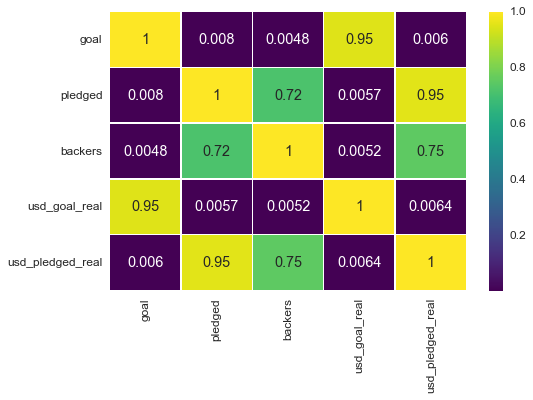

In [11]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
sns.heatmap(data[num].corr(), cmap='viridis', annot=True, linewidths=.5);

Очевидна корелляция между **goal** и **usd_goal_real**, **pledged** и **usd_pledged_real**. Заметно, что итоговая сумма пожертвований сильно зависит от количества спонсоров. 

Посмотрим на среднее значение числовых признаков

In [12]:
data.pivot_table(['backers', 'usd_pledged_real', 'usd_goal_real'], ['state'], aggfunc='mean')

,backers,usd_goal_real,usd_pledged_real
state,,,
failed,16.422510,63174.495905,1320.620638
successful,263.921362,9532.853357,22670.795231


Интересное наблюдение. Средняя запрашиваемая сумма у проваленных проектов почти в 7 раз больше, чем у успешных. Чтобы проект стал успешным, нужно быть скромнее :) Хотя это может говорить о том, что собрать меньшую сумму денег гораздо проще.

*Посмотрим на категориальные признаки*

In [13]:
cat = ['category', 'main_category', 'currency', 'country', 'state']

In [14]:
for c in cat:
    print('\nДанные по категориальному признаку {}'.format(c))
    print(data[c].value_counts())


Данные по категориальному признаку category
Product Design       18680
Documentary          14523
Music                12633
Tabletop Games       11744
Shorts               11394
Food                 10416
Video Games           9327
Film & Video          8624
Fiction               8108
Fashion               7529
Art                   7486
Nonfiction            7414
Theater               6684
Rock                  6246
Children's Books      6198
Apparel               6166
Technology            5726
Indie Rock            5329
Apps                  5287
Photography           5246
Webseries             5148
Publishing            5052
Narrative Film        4617
Comics                4581
Web                   4309
Country & Folk        4213
Crafts                4152
Design                3547
Hip-Hop               3459
Hardware              3115
                     ...  
Blues                  234
Animals                229
Couture                227
Fabrication Tools      215
Makerspace

Заметно, что в США запущено подавляющее число проектов, следовательно преобладающая валюта - американский доллар. В признаке **country** присутствует значение N,0" (видимо какая-то ошибка при парсинге данных). Позже попытаемся избавиться от него.

Посмотрим на количество проектов по категориям и подкатегориям.

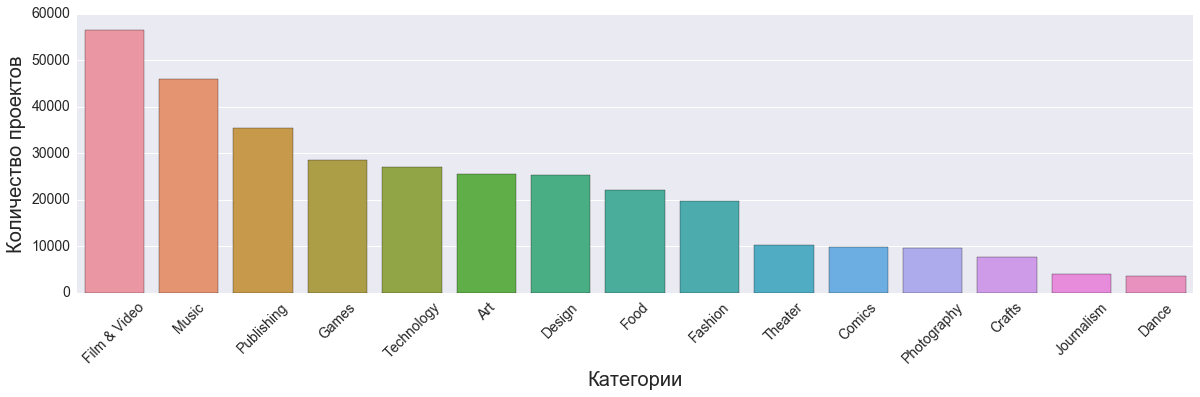

In [15]:
main_category = data['main_category'].value_counts()
main_category.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(20, 5))
sns.set(font_scale=1.4)
ax = sns.barplot(x=main_category.index, y=main_category.values)
ax.set_xlabel('Категории', fontsize=20)
ax.set_ylabel('Количество проектов', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

Заметно, что запущенных проектов больше в индустрии развлечений - фильмы, музыка. Судя по всему, часто собирают средства на публикацию авторы книг. 

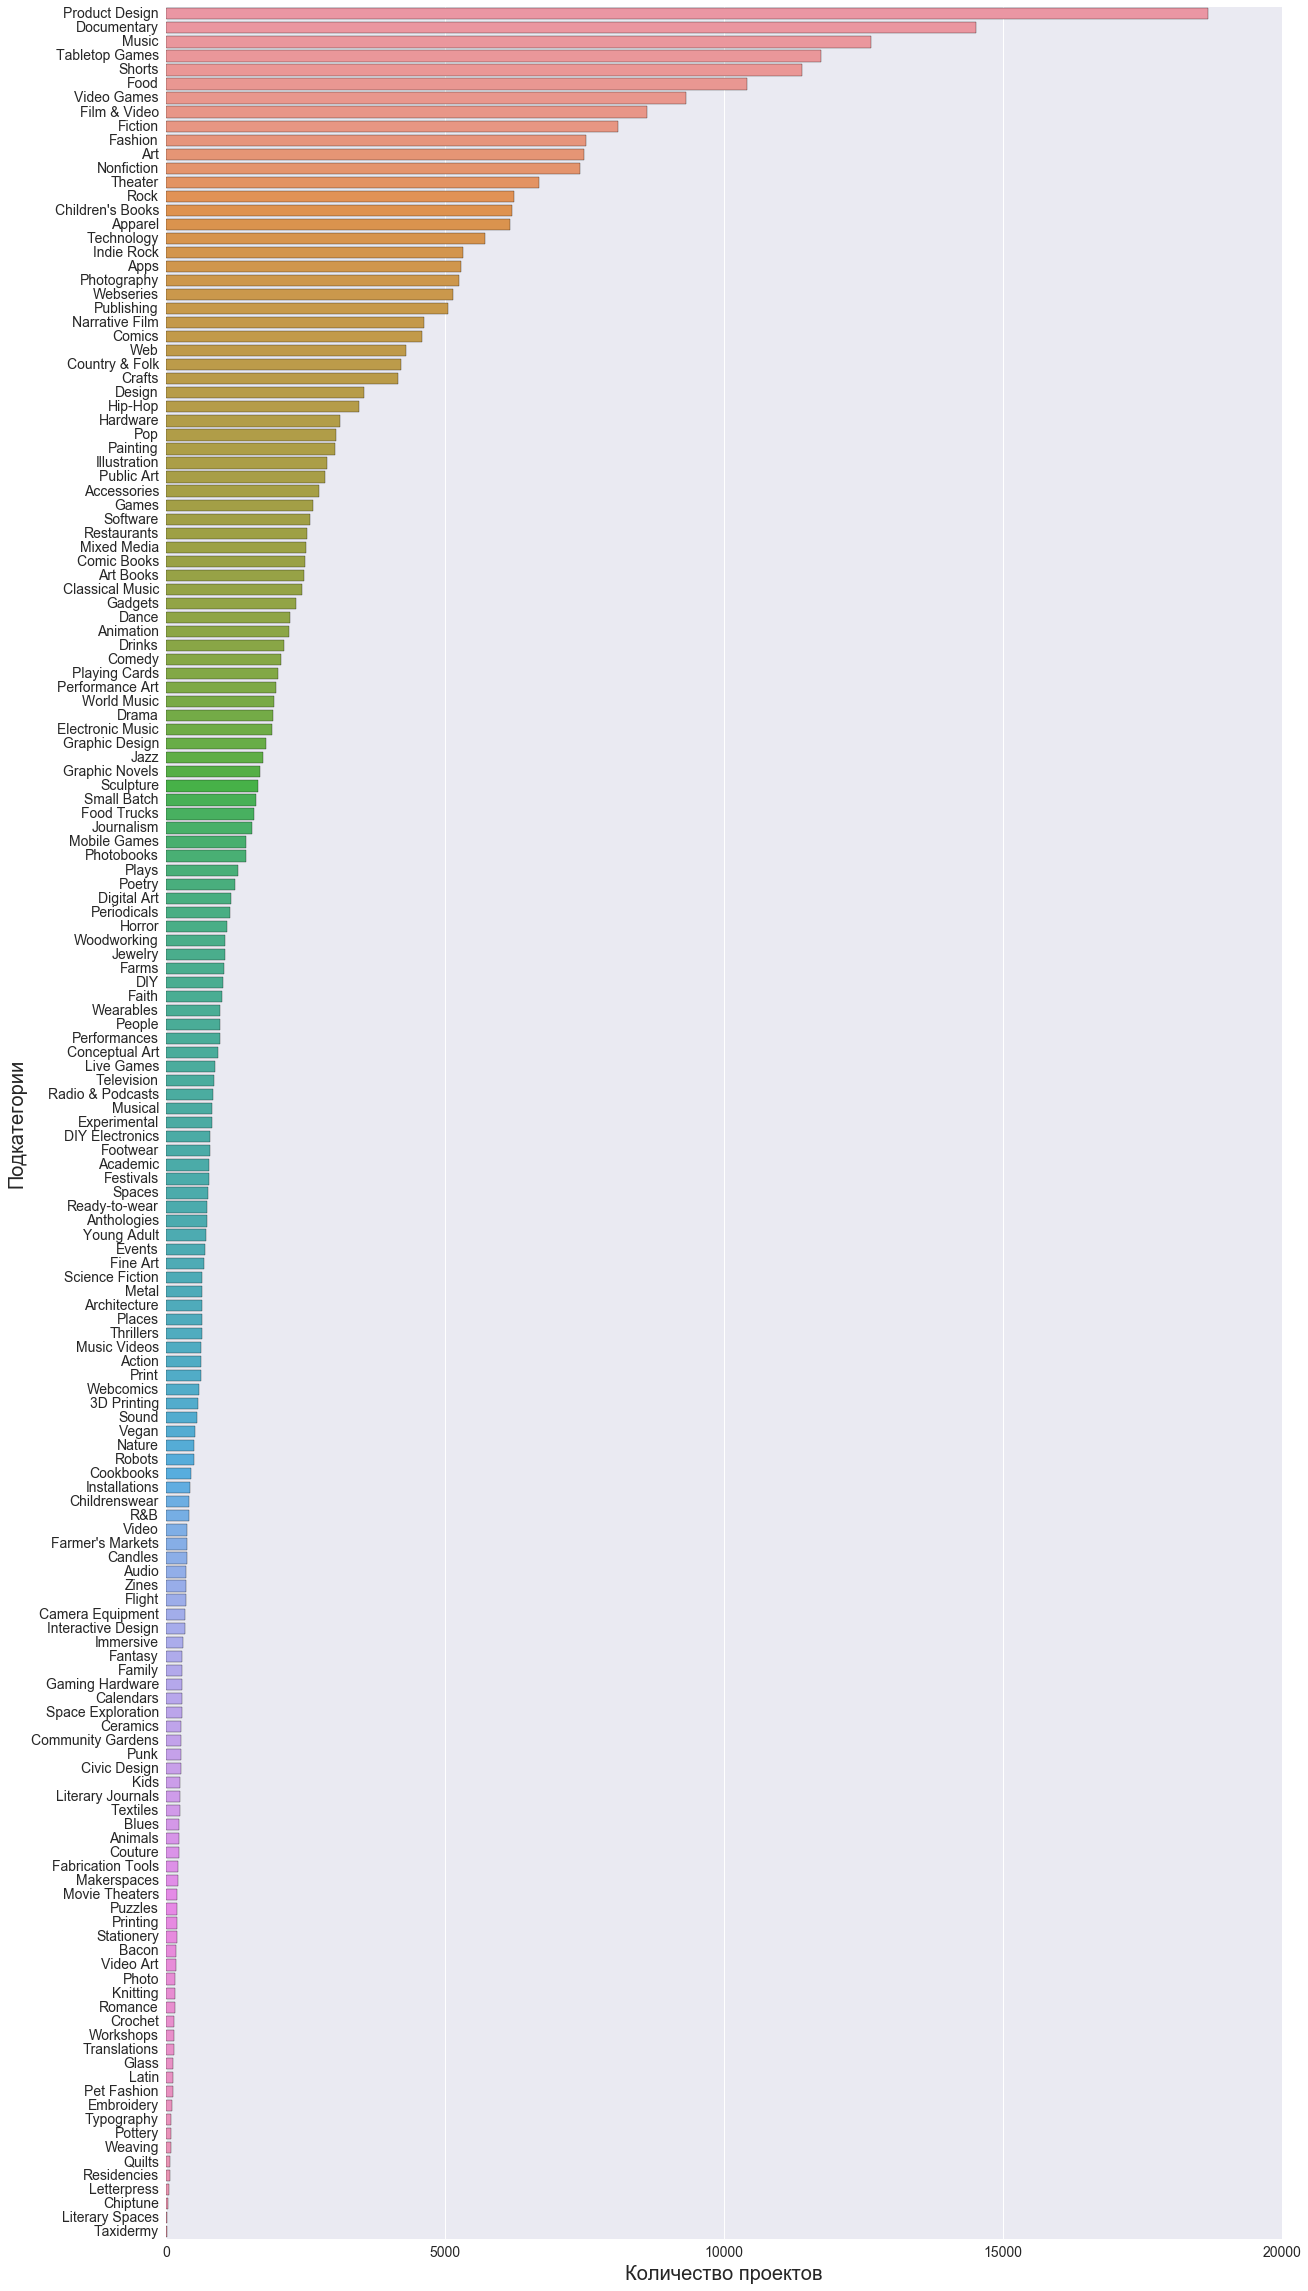

In [16]:
category = data['category'].value_counts()
category.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(20, 40))
sns.set(font_scale=1.4)
ax = sns.barplot(y=category.index, x=category.values)
ax.set_xlabel('Количество проектов', fontsize=20)
ax.set_ylabel('Подкатегории', fontsize=20)
plt.show();

*Посмотрим на целевую переменную*

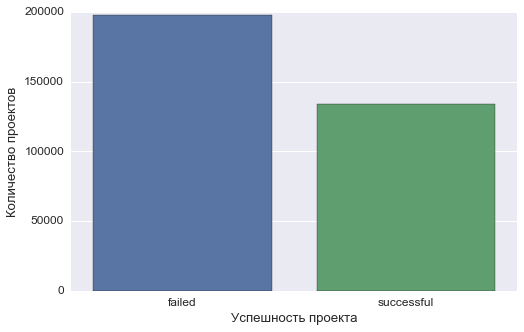

In [17]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
ax = sns.countplot(data['state'])
ax.set(xlabel='Успешность проекта', ylabel='Количество проектов')
plt.show();

В классах присутствует небольшой дисбаланс. Заметно, что количество проектов, которые не смогли набрать нужную сумму к дедлайну, всё-таки больше. Что логично, не так-то просто заставить людей отдать свои деньги :)

###  Часть 3. Первичный визуальный анализ признаков

*Подробно посмотрим на числовые признаки*

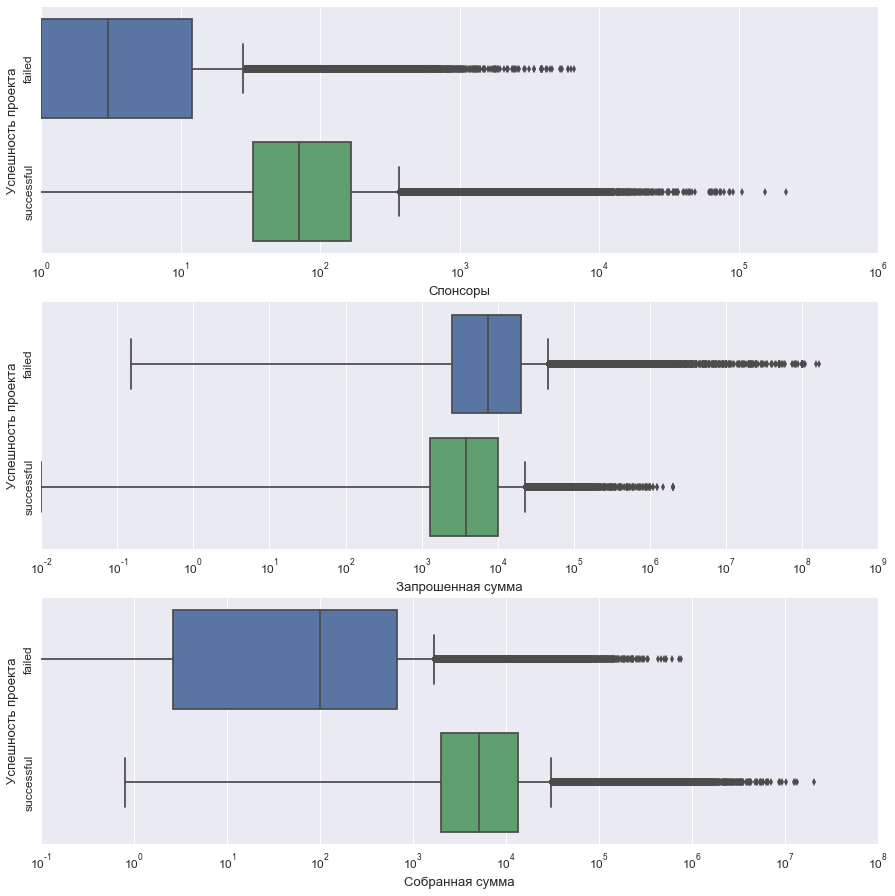

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

ax[0] = sns.boxplot(x=data['backers'], y=data['state'], orient='h', ax=ax[0])
ax[0].set_xscale('log')
ax[0].set(xlabel='Спонсоры', ylabel='Успешность проекта')
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=90)

ax[1] = sns.boxplot(x=data['usd_goal_real'], y=data['state'], orient='h', ax=ax[1])
ax[1].set_xscale('log')
ax[1].set(xlabel='Запрошенная сумма', ylabel='Успешность проекта')
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=90)

ax[2] = sns.boxplot(x=data['usd_pledged_real'], y=data['state'], orient='h', ax=ax[2])
ax[2].set_xscale('log')
ax[2].set(xlabel='Собранная сумма', ylabel='Успешность проекта')
ax[2].set_yticklabels(ax[2].get_yticklabels(), rotation=90)

plt.show();

Выглядит все более-менее прилично. Заметен широких разброс числовых признаков - например, количество спонсоров у проекта может насчитывать пару сотен тысяч. Посмотрим на некоторые данные, чтобы проверить выбросы.

In [19]:
data[data['backers'] >= 100000]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
75900,1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,6465690.30,15000.0
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,10000.0
292244,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.0,2014-05-28 15:05:45,5408916.95,successful,105857,US,5408916.95,1000000.0


In [20]:
data[data['usd_goal_real'] <= 0.1].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
304489,620302213,LOVELAND Round 6: A Force More Powerful,Conceptual Art,Art,USD,2009-12-04,0.01,2009-11-25 07:54:49,100.0,successful,6,US,100.0,0.01


In [21]:
data[data['usd_pledged_real'] >= 10000000].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,500000.0
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,1000000.0
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,50000.0
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,100000.0
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,12393139.69,100000.0


Похоже на реальные значения, а не выбросы. К примеру, среди проектов собравших больше 10 млн. долларов - знаменитые Pebble и Pebble 2.

Чтобы посмотреть, как числовые признаки связаны друг с другом, построим *pairplot*. Перед этим прологарифмируем признаки.

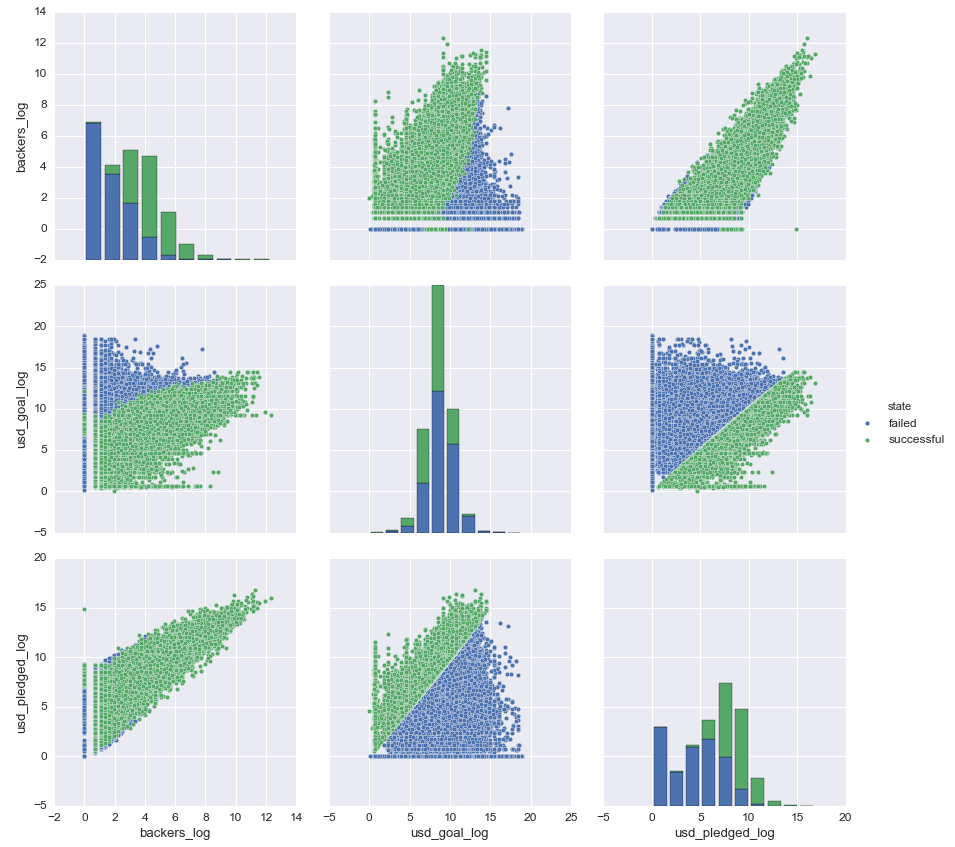

In [22]:
data['backers_log'] = np.log(data['backers'] + 1)
data['usd_goal_log'] = np.log(data['usd_goal_real'] + 1)
data['usd_pledged_log'] = np.log(data['usd_pledged_real'] + 1)

num_log = ['backers_log', 'usd_goal_log', 'usd_pledged_log', 'state']

sns.pairplot(data[num_log], diag_kind='hist', hue='state', size=4)
plt.show();

*Подробно рассмотрим категориальные признаки*

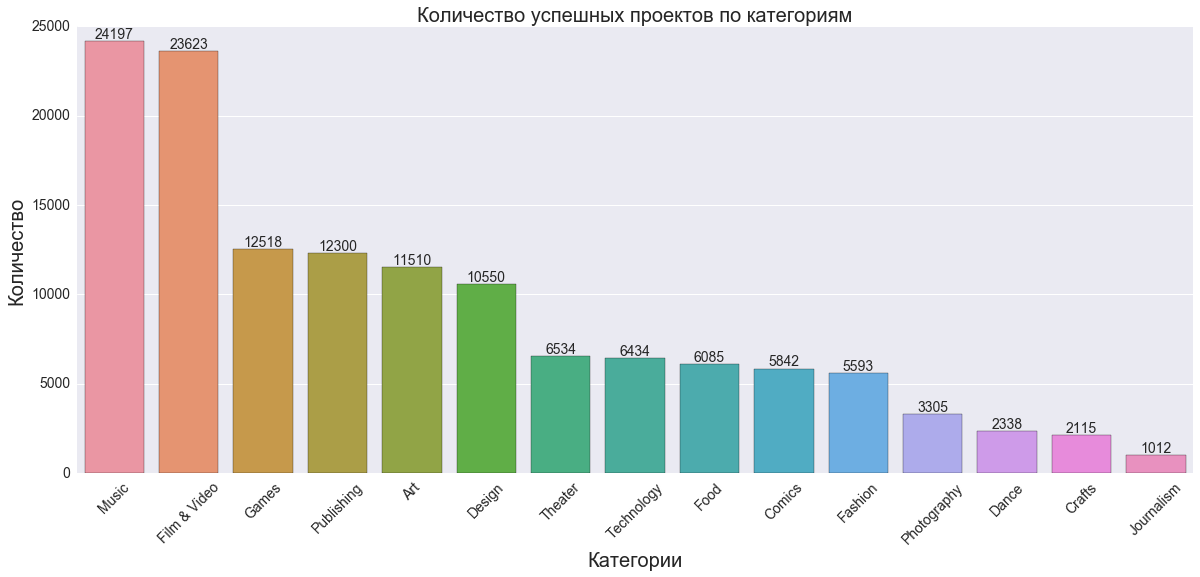

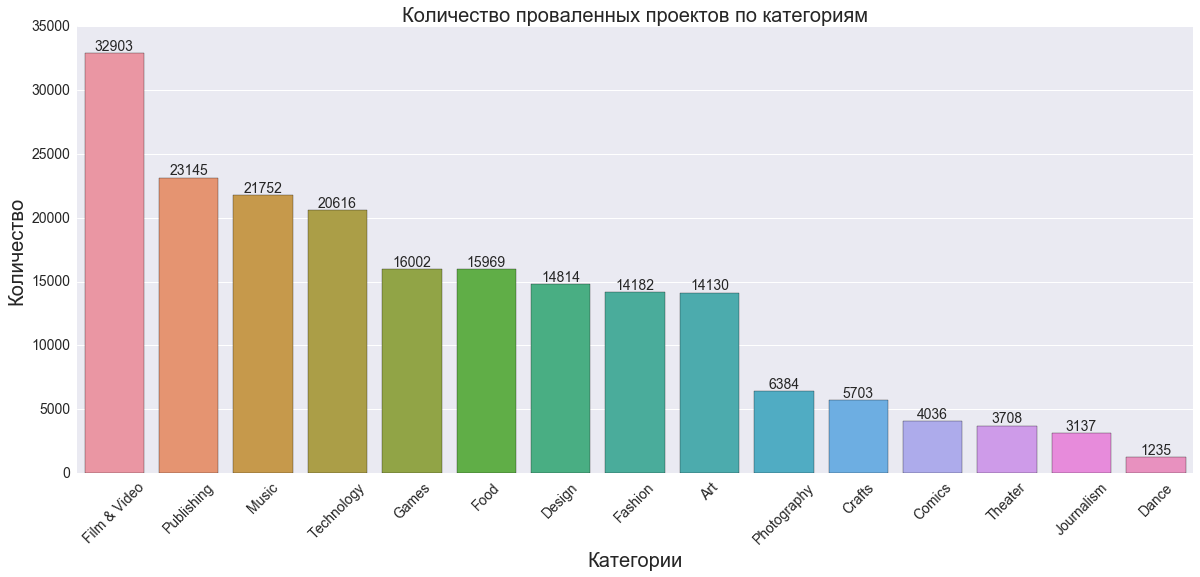

In [23]:
cat_success = data[data['state'] == 'successful']['main_category'].value_counts()
plt.figure(figsize = (20, 8))
sns.set(font_scale=1.4)
ax1 = sns.barplot(x=cat_success.index, y=cat_success.values)
ax1.set_title('Количество успешных проектов по категориям', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Категории', fontsize=20)
ax1.set_ylabel('Количество', fontsize=20)

for p in ax1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.0f}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom', fontsize=14)

cat_failed = data[data['state'] == 'failed']['main_category'].value_counts()
plt.figure(figsize = (20, 8))
ax2 = sns.barplot(x=cat_failed.index, y=cat_failed.values)
ax2.set_title('Количество проваленных проектов по категориям', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel('Категории', fontsize=20)
ax2.set_ylabel('Количество', fontsize=20)

for p in ax2.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax2.annotate('{:.0f}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom', fontsize=14)

plt.show();

Получается занимательная картинка. Видно, что по некоторым категориям количество успешных проектов больше, чем провалившихся. Найдем все такие категории.

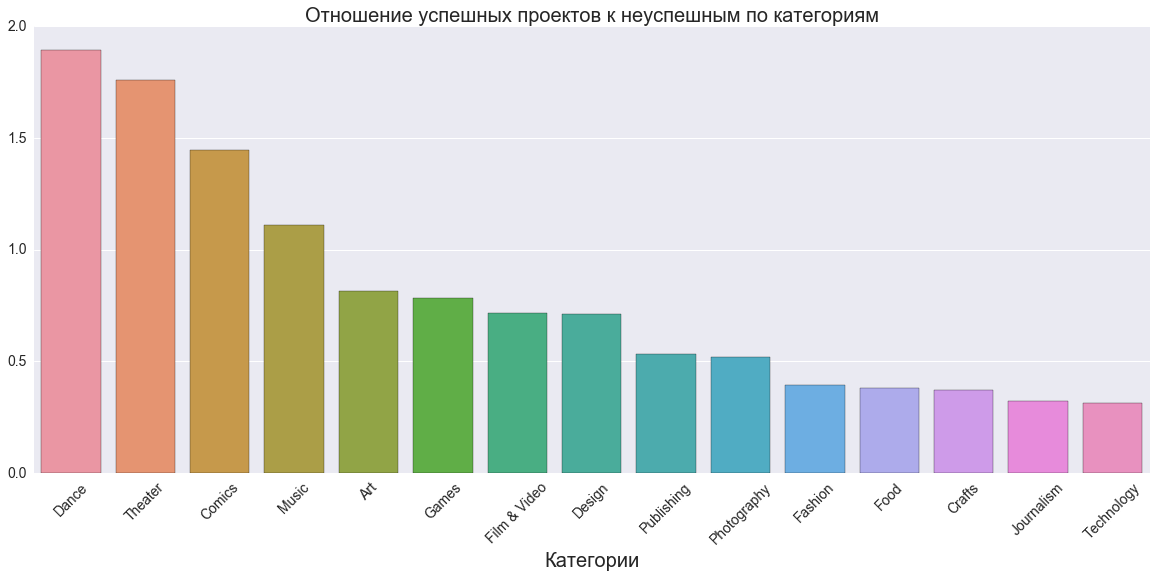

In [24]:
success_to_falied = cat_success / cat_failed
success_to_falied.sort_values(ascending=False, inplace=True)
plt.figure(figsize = (20, 8))
ax = sns.barplot(x=success_to_falied.index, y=success_to_falied.values)
ax.set_title('Отношение успешных проектов к неуспешным по категориям', fontsize=20)
ax.set_xlabel('Категории', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

Получили, что в четырех категориях (танцы, театр, комиксы, музыка) успешных проектов больше, чем провальных. Для музыки это достаточно удивительно, если учитывать, что проектов в данной категории очень много.

Приведем признаки **deadline** и **launched** к дата-формату и построим признаки от времени. А также приведем целевой признак **state** к числовому формату.

In [25]:
data['deadline'] = pd.to_datetime(data['deadline'])
data['launched'] = pd.to_datetime(data['launched'])

In [26]:
data['launch_year'] = data['launched'].dt.year
data['launch_month'] = data['launched'].dt.month
data['launch_day'] = data['launched'].dt.day
data['launch_dw'] = data['launched'].dt.dayofweek
data['launch_hour'] = data['launched'].dt.hour

data['deadline_year'] = data['deadline'].dt.year
data['deadline_month'] = data['deadline'].dt.month

In [27]:
state_int = {'failed' : 0, 'successful' : 1}
data['state'] = data['state'].map(state_int)

Посмотрим как зависит количество запущенных проектов от года и от месяца.

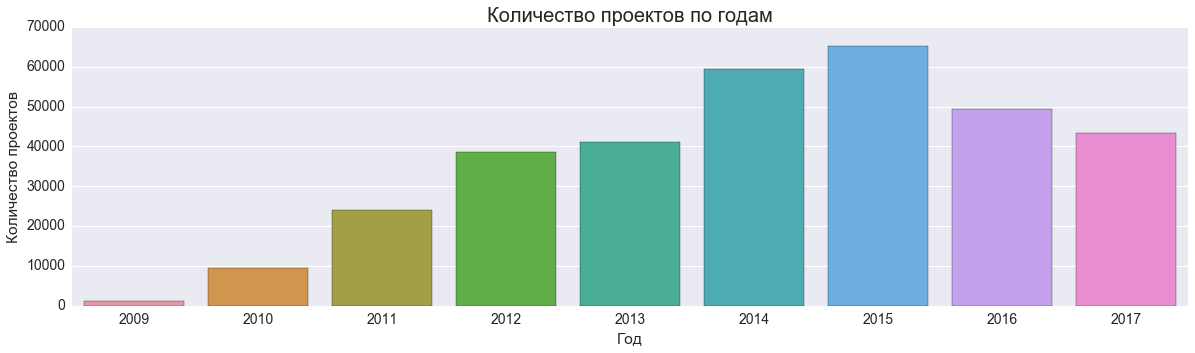

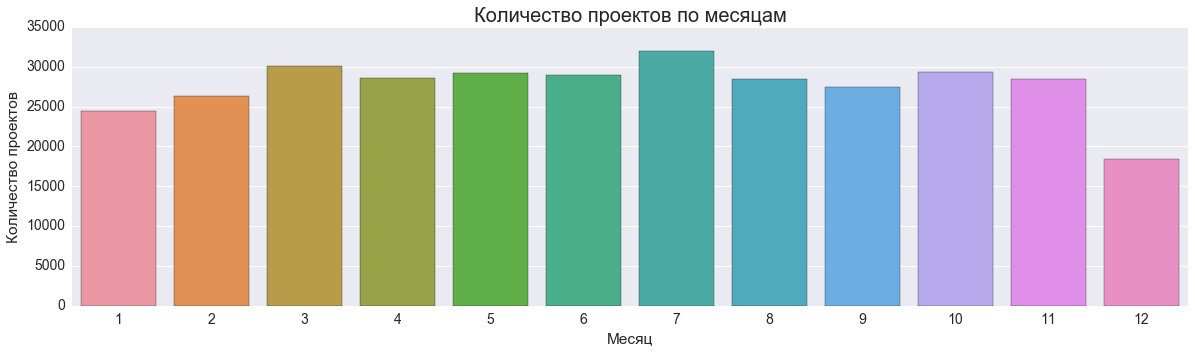

In [28]:
plt.figure(figsize=(20, 5))
pivot = data.pivot_table(columns=data['launch_year'], values='state', aggfunc='count')
ax1 = sns.barplot(pivot.columns.values, pivot.values[0])
plt.xlabel('Год')
plt.ylabel('Количество проектов')
plt.title('Количество проектов по годам', fontsize=20)

plt.figure(figsize=(20, 5))
pivot = data.pivot_table(columns=data['launch_month'], values='state', aggfunc='count')
ax2 = sns.barplot(pivot.columns.values, pivot.values[0])
plt.xlabel('Месяц')
plt.ylabel('Количество проектов')
plt.title('Количество проектов по месяцам', fontsize=20)
plt.show();

Заметно, что проекты стараются не запускать в декабре, по всей видимости сказывается новогодний и рождественский ажиотаж, поэтому есть риск, что проект не наберет достаточное количество спонсоров.

Подробнее посмотрим на временные признаки.

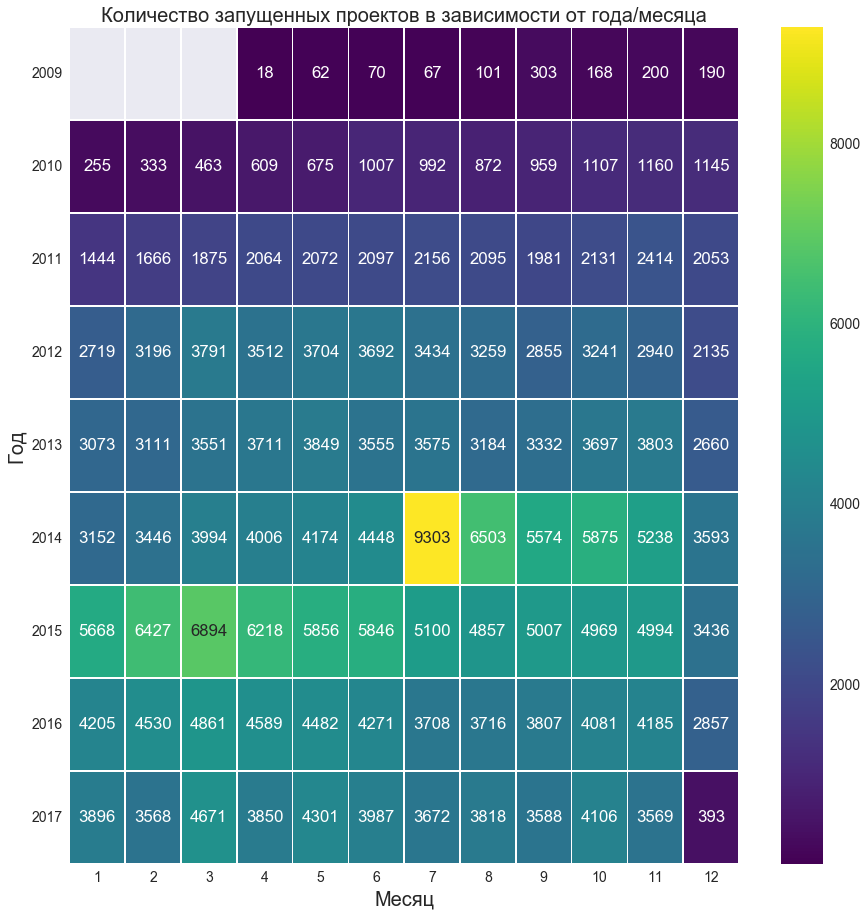

In [29]:
heat = data.groupby(['launch_year', 'launch_month']).size().unstack()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(heat, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
ax.set_title('Количество запущенных проектов в зависимости от года/месяца', fontsize=20)
ax.set_xlabel('Месяц', fontsize=20)
ax.set_ylabel('Год', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show();

Как и было сказано, в январе количество проектов падает. Видно что поначалу кикстартер разгонялся и первые три года количество проектов в месяц не превышало 2 тысяч. В глаза бросается июль 2014 года, что-то интересное произошло, от чего количество запущенных проектов выросло в два раза. Вполне возможно, что кикстартер запустили в новых странах. Сделаем такую же картинку, но для успешных проектов.

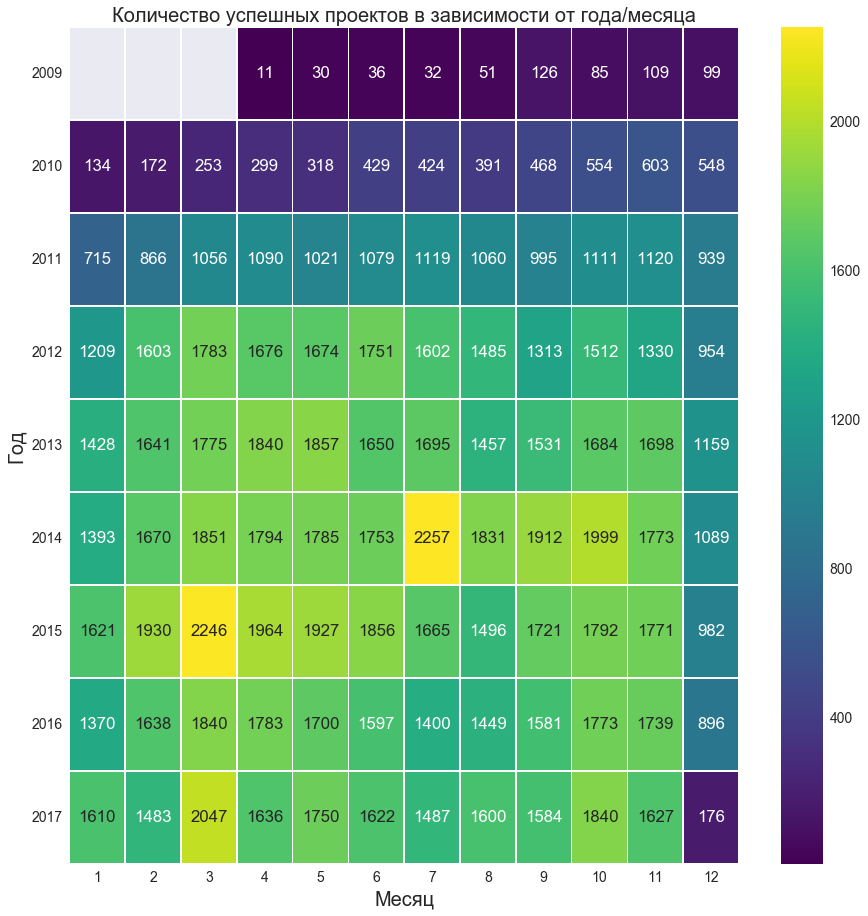

In [30]:
heat = data.groupby(['launch_year', 'launch_month'])['state'].sum().unstack()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(heat, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
ax.set_title('Количество успешных проектов в зависимости от года/месяца', fontsize=20)
ax.set_xlabel('Месяц', fontsize=20)
ax.set_ylabel('Год', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show();

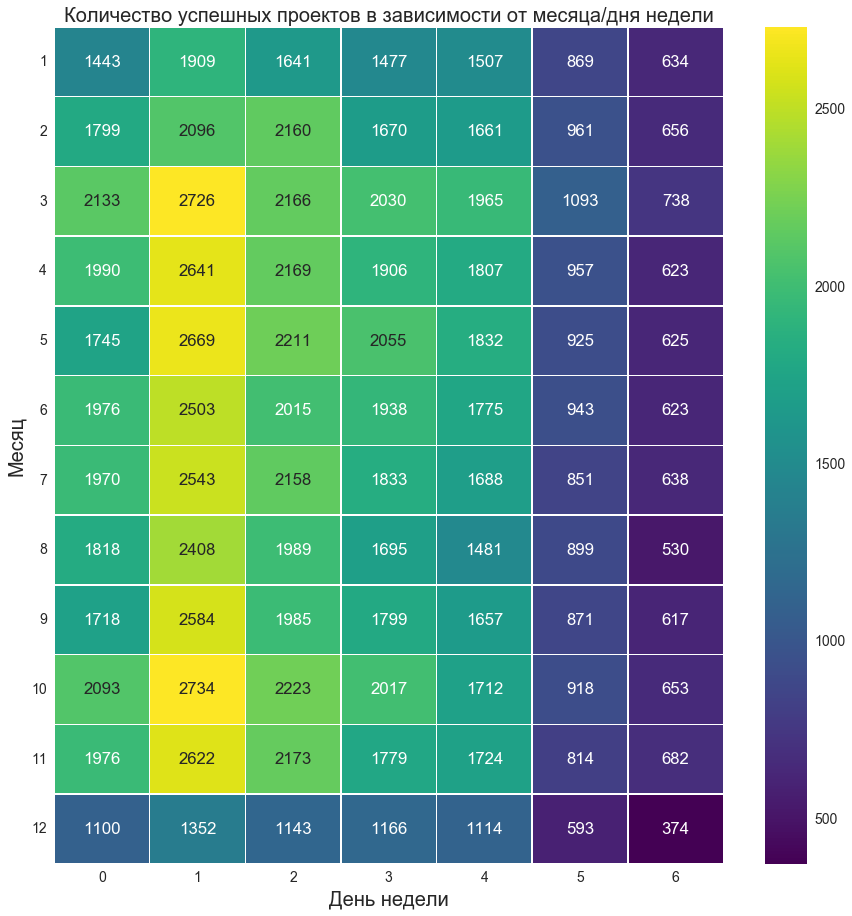

In [31]:
heat = data.groupby(['launch_month', 'launch_dw'])['state'].sum().unstack()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(heat, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
ax.set_title('Количество успешных проектов в зависимости от месяца/дня недели', fontsize=20)
ax.set_xlabel('День недели', fontsize=20)
ax.set_ylabel('Месяц', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show();

Хорошо заметно, что в выходные количество проектов падает. Тогда как самый пик - вторник, а дальше уже идет на убыль. Возьмем сей факт на вооружение при построении новых признаков. По вторнику заметно, что летом количество успешных проектов немного проседает.

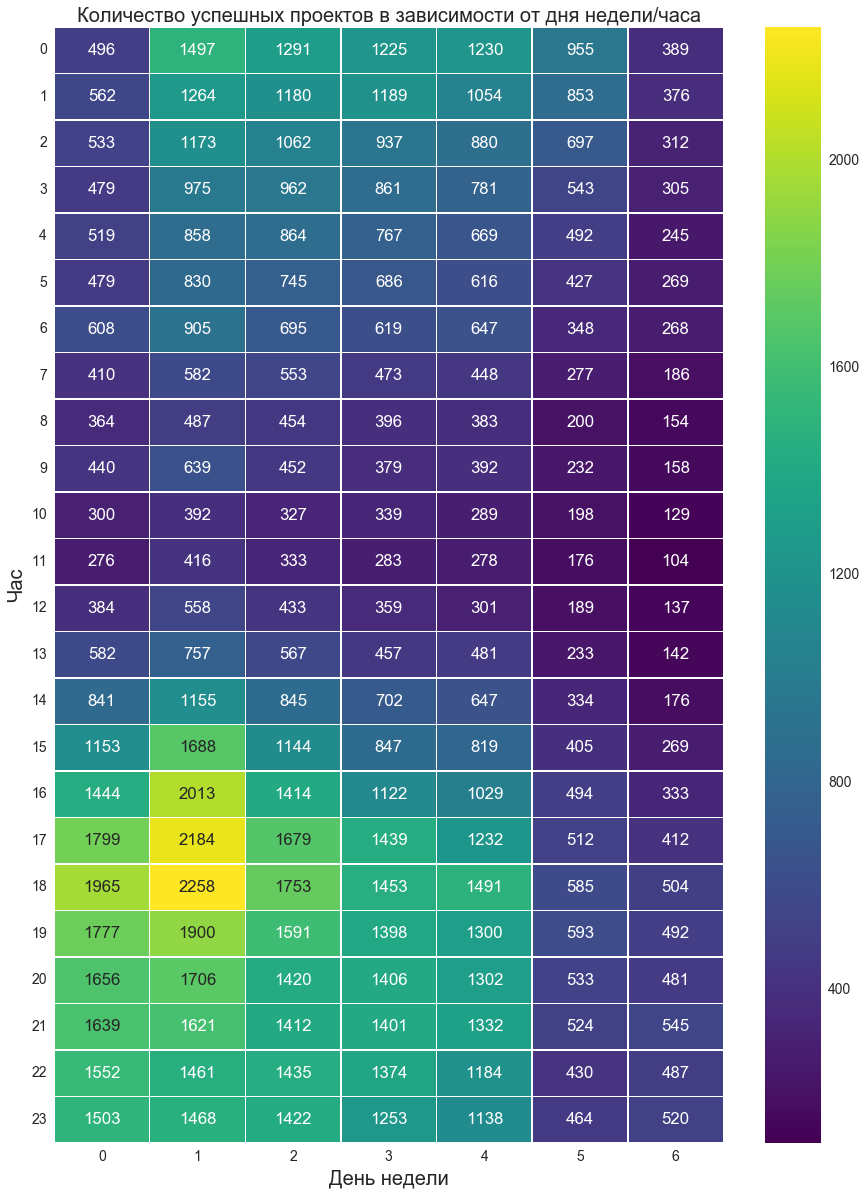

In [32]:
heat = data.groupby(['launch_hour', 'launch_dw'])['state'].sum().unstack()
plt.figure(figsize=(15, 20))
ax = sns.heatmap(heat, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
ax.set_title('Количество успешных проектов в зависимости от дня недели/часа', fontsize=20)
ax.set_xlabel('День недели', fontsize=20)
ax.set_ylabel('Час', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show();

Очень хорошо заметен промежуток с 6 утра до 12 дня, когда количество проектов проседает. Начиная с 17 до 19 в понедельник-среду самый пик запуска проектов, к концу недели количество проектов заметно снижается. Вывод такой, если хочешь запустить успешный проект - не выбирай выходные для старта :)

Введем новый признак - продолжительность кампании сбора средств в месяцах. И посмотрим, как влияет длительность сбора на успешность проекта.

In [33]:
data['launch_month_year'] = data['launched'].dt.to_period("M")
data['deadline_month_year'] = data['deadline'].dt.to_period("M")

In [34]:
data['duration'] = data['deadline_month_year'] - data['launch_month_year']

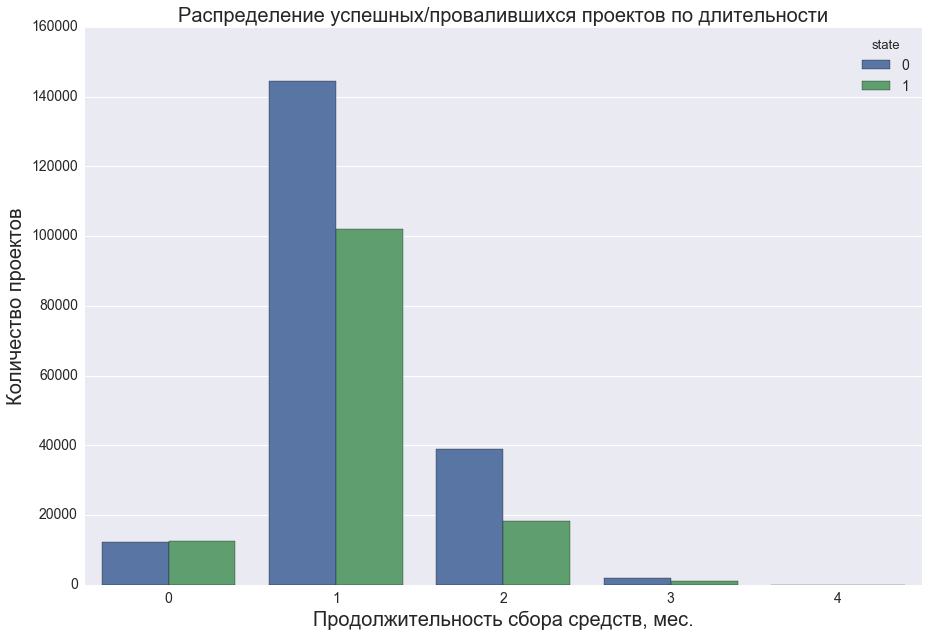

In [35]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x='duration', hue='state', data=data)
ax.set_title('Распределение успешных/провалившихся проектов по длительности', fontsize=20)
ax.set_xlabel('Продолжительность сбора средств, мес.', fontsize=20)
ax.set_ylabel('Количество проектов', fontsize=20)
plt.show();

У проектов со сроком сбора средств меньше одного месяца почти равное соотношение успешных/провалившихся. Тогда как проекты с продолжительностью больше одного месяца, имеют больший шанс провалиться. 

###  Часть 4. Закономерности, "инсайты", особенности данных

Выводы:
 - числовые признаки имеют широкий разброс значений (обусловлено природой данных)
 - медиана запрошенной суммы меньше у успешных проектов -> нужно быть скромнее
 - сумма пожертвований линейно зависит от количества спонсоров, что в принципе очевидно
 - есть только четыре категории (танцы, театр, комиксы и музыка), где количество успешных проектов больше, чем провалившихся
 - в декабре количество проектов падает (возможно связано с рождественскими праздниками и новым годом), да и вообще зимой проектов меньше
 - суббота и воскресенье не лучшее время для запуска проекта (скорее всего от того, что люди обычно заняты в выходные и велик шанс, что проект не увидят)
 - лучшее время для запуска: вторник с 17 до 18 вечера 
 - среди проектов с длительностью меньше 1 месяца практически равное число успешных и провалившихся проектов
 - проекты, которые собирают деньги больше 1 месяца имеют больше шансов провалиться (тут связано с тем фактом, что длительный срок бывает у таких проектов, которым требуется собрать большую сумму денег)

###  Часть 5. Выбор метрики и модели

Решаем задачу бинарной классификации. Есть небольшой дисбаланс в целевой переменной (ответы смещены в сторону класса **failed**). Будем использовать метрику ROC AUC. Данная метрика является довольно распространненой для задач с дисбалансом классов.

Дла решение задачи классификации я рассмотрел два классических алгоритма:
 - случайный лес *RandomForestClassifier* 
 - логиcтическая регрессия *LogisticRegression*

###  Часть 6. Предобработка данных 

Загружаем данные

In [36]:
data = pd.read_csv('..\data\ks-projects-201801.csv')

Раньше было обнаружено, что есть некая страна N,0". Похоже на ошибку парсинга, либо кикстартер плохо выдает страну по некоторым проектам. Так как у нас есть признак **currency** можно восстановить часть данных. Для евро, к сожалению, это не будет так просто, данная валюта является официальной для 19 стран и из какой именно страны был запущен проект сложно узнать.

In [37]:
wrong_country = (data['country'] == 'N,0"')
d_country = {'USD':'US', 'GBP':'GB', 'CAD':'CA', 'AUD': 'AU', 'SEK':'SE', 'NZD':'NZ', 'DKK':'DK', 'NOK':'NK', 'CHF':'CH'}
data.loc[wrong_country, 'country'] = data.loc[wrong_country, 'currency'].map(d_country)

Из-за такой замены в наборе данных появились пропуски (из-за валюты Евро). Выкинем их и другие пропуски

In [38]:
data.dropna(inplace=True)

In [39]:
data.drop(data[(data['state'] == 'canceled') | (data['state'] == 'live') | (data['state'] == 'suspended') | (data['state'] == 'undefined')].index, inplace=True)

Целевую переменную к числовому типу

In [40]:
state_int = {'failed' : 0, 'successful' : 1}
data['state'] = data['state'].map(state_int)

Выделим признаки для обучения

In [41]:
X = data[['main_category', 'category', 'country', 'currency', 'usd_goal_real']]
y = data[['state']]

Теперь преобразуем признаки: скалируем признак **usd_goal_real**; к категориальным признакам применим OHE кодирование

In [42]:
scaler = StandardScaler()
X_goal_scale = X['usd_goal_real'].values.reshape(-1, 1)
X_goal_scaled = scaler.fit_transform(X_goal_scale)

In [43]:
le = LabelEncoder()

X['main_category'] = le.fit_transform(X['main_category'])
X['category'] = le.fit_transform(X['category'])
X['country'] = le.fit_transform(X['country'])
X['currency'] = le.fit_transform(X['currency'])

ohe = OneHotEncoder(sparse=False)

ohe_mcat = ohe.fit_transform(X.main_category.values.reshape(-1, 1))
ohe_cat = ohe.fit_transform(X.category.values.reshape(-1, 1))
ohe_country = ohe.fit_transform(X.country.values.reshape(-1, 1))
ohe_currency = ohe.fit_transform(X.currency.values.reshape(-1, 1))

In [44]:
X_transformed = np.hstack((X_goal_scaled, ohe_currency, ohe_mcat, ohe_cat, ohe_country))

Разобьем на обучающую и тестовую выборки

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

###  Часть 7. Создание новых признаков и описание этого процесса

Перед тем, как создавать новые признаки, проверим базовые признаки на моделях с параметрами "из коробки"

In [46]:
%%time
logit = LogisticRegression(random_state=42, n_jobs=-1).fit(X_train, y_train)
y_pred = logit.predict_proba(X_test)[:, 1]
print('Logistic Regressor baseline score: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))

Logistic Regressor baseline score: 70.690
Wall time: 4.45 s


In [47]:
%%time
forest = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)
y_pred = forest.predict_proba(X_test)[:, 1]
print('Random Forest Classifier baseline score: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))

Random Forest Classifier baseline score: 67.509
Wall time: 7.04 s


Модель логистической регрессии оказалась точнее, чем случайный лес. Добавим новые признаки

In [48]:
# создадим временные признаки
data['deadline'] = pd.to_datetime(data['deadline'])
data['launched'] = pd.to_datetime(data['launched'])

data['launch_ym'] = (100 * data['launched'].dt.year + data['launched'].dt.month).astype(int)
data['is_tuesday'] = (data['launched'].dt.dayofweek == 1).astype(int)

data['morning'] = ((data['launched'].dt.hour >= 7) & (data['launched'].dt.hour <= 13)).astype(int)
data['day'] = ((data['launched'].dt.hour >= 14) & (data['launched'].dt.hour <= 16)).astype(int)
data['eve'] = ((data['launched'].dt.hour >= 17) & (data['launched'].dt.hour <= 21)).astype(int)
data['is_launch_time'] = ((data['launched'].dt.dayofweek < 5) 
                          & (data['launched'].dt.hour >= 15) 
                          & (data['launched'].dt.hour <= 23)).astype(int)

# вычислим длительность сбора средств в днях 
data['duration_day'] = data['deadline'].dt.to_period("D") - data['launched'].dt.to_period("D")

In [49]:
X_new_features = data[['duration_day', 'launch_ym', 'day', 'morning', 'eve', 'is_tuesday', 'is_launch_time']]
X_new_features_scaled = scaler.fit_transform(X_new_features)
X_new_feat = np.hstack((X_transformed, X_new_features_scaled))
X_new_feat_train, X_new_feat_test, y_train, y_test = train_test_split(X_new_feat, y, test_size=0.3, random_state=42)

Посмотрим, как влияют новые признаки на точность прогнозирования

In [50]:
%%time
logit.fit(X_new_feat_train, y_train)
y_pred = logit.predict_proba(X_new_feat_test)[:, 1]
print('Logistic Regressor score with new features: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))

Logistic Regressor score with new features: 71.745
Wall time: 11.9 s


In [51]:
%%time
forest.fit(X_new_feat_train, y_train)
y_pred = forest.predict_proba(X_new_feat_test)[:, 1]
print('Random Forest Classifier score with new features: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))

Random Forest Classifier score with new features: 68.630
Wall time: 6.43 s


###  Часть 8. Кросс-валидация, подбор параметров

Так как в данных у нас есть зависимость от времени, то для корректной кросс-валидации необходимо использовать *TimeSeriesSplit*

*Logistic Regression*

In [52]:
time_split = TimeSeriesSplit(n_splits=10)

In [53]:
c_values = np.array([0.1, 1, 10, 50, 100])
logit_grid_searcher = GridSearchCV(estimator=logit, param_grid={'C': c_values}, 
                                   scoring='roc_auc', n_jobs=-1, cv=time_split, verbose=1)

In [54]:
%%time
logit_grid_searcher.fit(X_new_feat_train, y_train)
print('Best score: %0.3f' % (100 * logit_grid_searcher.best_score_))
print('Best parameters: %s' % logit_grid_searcher.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


Best score: 71.609
Best parameters: {'C': 100.0}
Wall time: 3min 50s


In [55]:
y_pred = logit_grid_searcher.predict_proba(X_new_feat_test)[:, 1]
print('Logistic Regressor score after timesplit CV: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))

Logistic Regressor score after timesplit CV: 71.794


*Random Forest Classifier*

In [56]:
parameters = {'n_estimators' : [10, 20],
                  'max_features' : [100],
                  'max_depth' : [10, 20]
                 }
forest_grid_searcher = GridSearchCV(estimator=forest, param_grid=parameters, 
                                    scoring='roc_auc', n_jobs=-1, cv=time_split, verbose=1)

In [57]:
%%time
forest_grid_searcher.fit(X_new_feat_train, y_train)
print('Best score: %0.3f' % (100 * forest_grid_searcher.best_score_))
print('Best parameters: %s'% forest_grid_searcher.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.7min finished


Best score: 72.924
Best parameters: {'max_depth': 20, 'max_features': 100, 'n_estimators': 20}
Wall time: 7min 12s


In [58]:
y_pred = forest_grid_searcher.predict_proba(X_new_feat_test)[:, 1]
print('Random Forest Classifier score after timesplit CV: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))

Random Forest Classifier score after timesplit CV: 73.748


###  Часть 9. Построение кривых валидации и обучения 

In [59]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

In [60]:
train_sizes = np.linspace(0.05, 1, 10)
N_train_logit, learn_train_logit, learn_test_logit = model_selection.learning_curve(logit_grid_searcher.best_estimator_,
                                                                                    X_new_feat_train, y_train, 
                                                                                    train_sizes=train_sizes, cv=time_split,
                                                                                    scoring='roc_auc', n_jobs=-1)

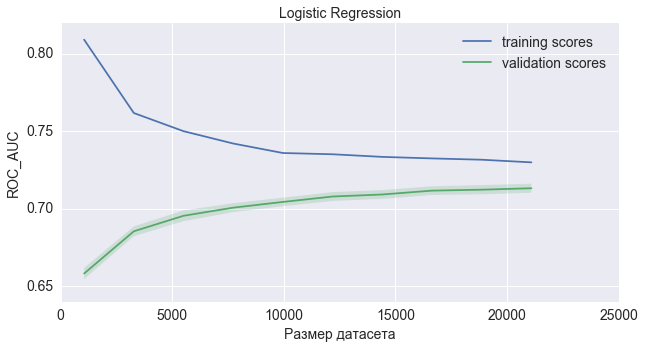

In [61]:
plt.figure(figsize = (10, 5))
plot_with_err(N_train_logit, learn_train_logit, label='training scores')
plot_with_err(N_train_logit, learn_test_logit, label='validation scores')
plt.xlabel('Размер датасета', fontsize=14)
plt.ylabel('ROC_AUC', fontsize=14)
plt.title('Logistic Regression', fontsize=14)
plt.grid(True)
plt.legend();

Кривые сходятся, это не очень хорошо. Добавление данных в датасет определенно не пойдет на пользу, точность прогнозирования не повысится. 

In [62]:
N_train_forest, learn_train_forest, learn_test_forest = model_selection.learning_curve(forest_grid_searcher.best_estimator_,
                                                  X_new_feat_train, y_train, train_sizes=train_sizes, cv=time_split,
                                                  scoring='roc_auc', n_jobs=-1)

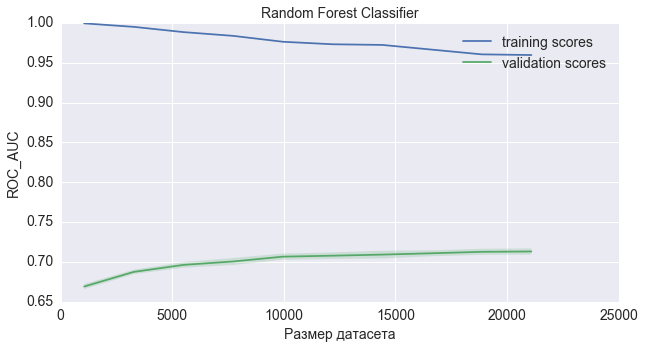

In [63]:
plt.figure(figsize = (10, 5))
plot_with_err(N_train_forest, learn_train_forest, label='training scores')
plot_with_err(N_train_forest, learn_test_forest, label='validation scores')
plt.xlabel('Размер датасета', fontsize=14)
plt.ylabel('ROC_AUC', fontsize=14)
plt.title('Random Forest Classifier', fontsize=14)
plt.grid(True)
plt.legend();

Схожая картинка. Возможно надо поиграться с признаками, чтобы случайный лес дал лучшую оценку.

###  Часть 10. Прогноз для тестовой или отложенной выборки

In [64]:
y_pred = logit_grid_searcher.predict_proba(X_new_feat_test)[:, 1]
print('Logistic Regressor на тестовой выборке: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))
y_pred = forest_grid_searcher.predict_proba(X_new_feat_test)[:, 1]
print('Random Forest Classifier на тестовой выборке: %0.3f' % (100 * roc_auc_score(y_test, y_pred)))

Logistic Regressor на тестовой выборке: 71.794
Random Forest Classifier на тестовой выборке: 73.748


Кросс-валидация позволила модели Random Forest Classifier выдать лучшую оценку.

### Часть 11. Выводы 

Построена модель для прогнозирования успешности проекта. Оценка не очень большая получилась, хотелось бы больше :) Возможно не хватает данных - например, подробное описание проекта, количество медиа-контента на странице проекта, количество обновлений страницы проекта во течение кампании сбора средств и т.д. Более аккуратные поиск и создание новых признаков тоже может дать улучшение качества модели. Что еще можно сделать? Конечно же решать задачу многоклассовой классификации :)  